In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [4]:
FDIR = './out/'
FFMT = 'png'
FDPI = 100

In [36]:
def plot_MC(R,
            X_in, Y_in,
            X_out, Y_out,
            save):
  
  fig, ax = plt.subplots(1,1,figsize=(8,8))
  ax.axis('off')
  
  ax.scatter(X_in, Y_in,
             fc='tab:red', ec='none', s=10**2, alpha=0.5, zorder=2)
  ax.scatter(X_out, Y_out,
             fc='blue', ec='none', s=10**2, alpha=0.5, zorder=2)

  circ = Circle((0,0),radius=R,
                fc='none', ec='black', lw=4, alpha=0.8, zorder=3)
  ax.add_patch(circ)
  
  ax.set_xlim(0,R)
  ax.set_ylim(0,R)
  
  if not os.path.exists(FDIR):
    os.makedirs(FDIR)
  if save:
    plt.savefig(os.path.join(FDIR, 'monte_carlo') + f'.{FFMT}',
                dpi=FDPI,
                bbox_inches='tight')

  plt.show()

In [37]:
def monte_carlo(R=1, N=1000,
                save=True):
  
  # Generate N random coordinates in x,y `\in` [0,R]
  X = np.random.random(size=N) * R
  Y = np.random.random(size=N) * R
  
  x_mask_in = (X**2 + Y**2) < R**2
  y_mask_in = (X**2 + Y**2) < R**2
  
  plot_MC(R=R,
          X_in=X[x_mask_in], Y_in=Y[y_mask_in],
          X_out=X[~x_mask_in], Y_out=Y[~y_mask_in], save=save)

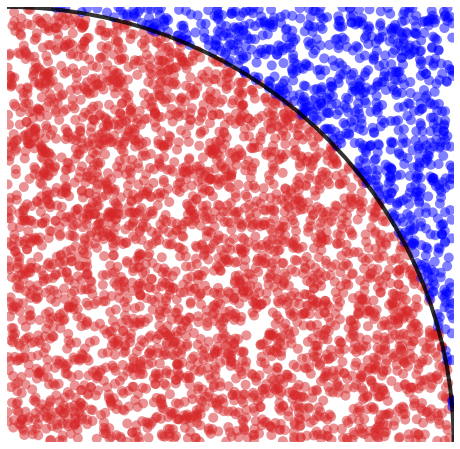

In [38]:
monte_carlo(R=1, N=4000)